In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\ Drive/dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/fact/1022.txt   
  inflating: dataset/fact/1023.txt   
  inflating: dataset/fact/1024.txt   
  inflating: dataset/fact/1025.txt   
  inflating: dataset/fact/1026.txt   
  inflating: dataset/fact/1027.txt   
  inflating: dataset/fact/1028.txt   
  inflating: dataset/fact/1029.txt   
  inflating: dataset/fact/103.txt    
  inflating: dataset/fact/1030.txt   
  inflating: dataset/fact/1031.txt   
  inflating: dataset/fact/1032.txt   
  inflating: dataset/fact/1033.txt   
  inflating: dataset/fact/1034.txt   
  inflating: dataset/fact/1035.txt   
  inflating: dataset/fact/1036.txt   
  inflating: dataset/fact/1037.txt   
  inflating: dataset/fact/1038.txt   
  inflating: dataset/fact/1039.txt   
  inflating: dataset/fact/104.txt    
  inflating: dataset/fact/1040.txt   
  inflating: dataset/fact/1041.txt   
  inflating: dataset/fact/1042.txt   
  inflating: dataset/fact/1043.txt   
  inflating: dataset/fact/1044.txt   

In [ ]:
import csv
import glob
import pandas as pd
import os

In [ ]:
dirpath = "./dataset"
outputpath = 'datasetcsv.csv'
columns_name =["news","label"]
output = open(outputpath,'w')
csvout = csv.DictWriter(output,columns_name)
csvout.writeheader()
count =0
folders_name = os.listdir(dirpath);
for folder in folders_name:
  files = os.listdir(dirpath + '/' + folder)
  for f in files :
    with open(dirpath + '/' + folder + '/' + f,encoding="utf8",errors="ignore")as afile:
      text_file = afile.read().replace('\n','')
      row = {'news': text_file,'label': folder}
      csvout.writerow(row)
output.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

In [ ]:
df = pd.read_csv('datasetcsv.csv')
df

,news,label
0,واکسن کرونا ناتوان شد,fake
1,از همون اول نه به ماسک اعتقاد داشتم نه به واکسن,fake
2,بابا من ۳ سال از خدامه بگیرم ماسک نمیزنم واکسن...,fake
3,خب از نظرشون دو دز واکسن زده هم چون دز سوم رو ...,fake
4,تفاوتی بین آزمایش تشخیصی کووید 19 برای بزرگسال...,fake
...,...,...
5021,اینکه برخی از کشورها در حال تزریق دوز سوم واک...,fact
5022,مطالعه‌ی جدیدی دلیلی ارائه می‌دهد که چرا ویروس...,fact
5023,پژوهشگران در شمال کنیا برای پیشگیری از یکی از ...,fact
5024,مدارس کهگیلویه زنگ خطر کرونا برای پیک ششم,fact


In [ ]:
# print missing values information
print('missing values stats')
print(df.isnull().sum(), '\n')

# print some missing values
print('some missing values')
print(df[df['news'].isnull()], '\n')
df.dropna(inplace=True)

missing values stats
news     2
label    0
dtype: int64 

some missing values
     news label
3493  NaN  fact
4503  NaN  fact 



In [ ]:
!pip install hazm

In [ ]:
import hazm
import re

In [ ]:
normalizer = hazm.Normalizer()
stopwords = hazm.stopwords_list
tokenizer = hazm.word_tokenize
# lemmatizer = hazm.Lemmatizer()
stemmer = hazm.Stemmer()
def cleaning(text):
    text = text.strip()
    # normalizing
    text = normalizer.normalize(text)
    # removing wierd patterns
    tokens = tokenizer(text)
    filtered = list(set(tokens) - set(stopwords()))
    # Define a pattern to match punctuation characters (including Arabic and Persian punctuation)
    punctuation_pattern = list('،.؛؟!"#$%&\'()*+/:;<=>?@[\\]^_`{|}~')
    # Remove punctuation from the tokens
    filtered = list(set(filtered) - set(punctuation_pattern))
    # print(filtered)
    # Join the filtered tokens back into a single string
    stemmed = []
    for i in filtered:
      j = stemmer.stem(i)
      stemmed.append(j)
    text = ' '.join(filtered)
    # print(text)
    wierd_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u'\U00010000-\U0010ffff'
        u"\u200d"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\u3030"
        u"\ufe0f"
        u"\u2069"
        u"\u2066"
        u"\u2068"
        u"\u2067"
        "]+", flags=re.UNICODE)

    text = wierd_pattern.sub(r'', text)

    # removing extra spaces, hashtags
    text = re.sub("#", "", text)
    text = re.sub("\s+", " ", text)

    return text



In [ ]:
df['cleaned_news'] = df['news'].apply(cleaning)
df = df[['cleaned_news', 'label']]
df.columns = ['news', 'label']
df

,news,label
0,کرونا واکسن ناتوان,fake
1,ماسک داشتم همون واکسن اعتقاد,fake
2,ماسک بخور فراورده دنبال ۳ مریضی خدامه دوغ گوشت...,fake
3,نظرشون خب نزدن واکسن جزو زده میشن دز نزده‌ها,fake
4,تفاوتی کووید آزمایش بزرگسالان استفاده تشخیصی ۱...,fake
...,...,...
5021,دلیل داشته_باشیم کشورها نتیجه علمی واکسن اساس ...,fact
5022,فعال تمرکز پژوهشگران درحالی‌که ارائه کمتری سای...,fact
5023,خطرناک انتقال شمال راه‌های کرونا تلاش انسان ان...,fact
5024,زنگ کرونا ششم مدارس پیک کهگیلویه,fact


In [ ]:


from collections import Counter

# Count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count

In [ ]:
counter = counter_word(df.news)

In [ ]:
counter

Counter({'قرنطینه': 60,
         'درمانی': 47,
         'دلیل': 108,
         'کمتر': 76,
         'بیمار': 62,
         'بیمارستان\u200cها': 21,
         'پرستارانی': 1,
         'شیوع': 165,
         'تعویق': 13,
         'پزشکان': 31,
         'بالای': 67,
         'غیرضروری': 2,
         'امیکرون': 494,
         'جراحی': 10,
         'کادر': 28,
         'کلینیک\u200cها': 1,
         'رسیدگی': 4,
         'عمل\u200cهای': 1,
         'بیمارانی': 10,
         'انگلیس': 43,
         'افتاده_است': 3,
         'سطح': 57,
         'متصل': 19,
         'تاثیر': 127,
         'نتایج': 87,
         'سلولها': 2,
         'اسکریپس': 1,
         'دریافتند': 35,
         'غشاء': 1,
         'خونی': 23,
         'تنفسی': 98,
         'خارجی': 20,
         'acid': 1,
         'ورود': 51,
         'قدرتمند': 3,
         'کاهش': 238,
         'آنزیم': 11,
         'اسید': 2,
         'التهاب': 25,
         'کروناویروس': 196,
         '«': 304,
         'حاد': 49,
         'ترکیب': 32,
         'قبل

In [ ]:
counter.most_common(5)

[('کرونا', 1765), ('واکسن', 1406), ('۱۹', 838), ('ویروس', 664), ('کووید', 599)]

In [ ]:
num_unique_words = len(counter)

In [ ]:
# Split dataset into training and validation set
# train_size = int(df.shape[0] * 0.8)

# train_df = df[:train_size]
# test_df = df[train_size:]
# val_df = train_df[:(train_size*0.1)]
# # split text and labels
# train_sentences = train_df.news.to_numpy()
# train_labels = train_df.label.to_numpy()
# val_sentences = val_df.news.to_numpy()
# val_labels = val_df.label.to_numpy()

In [ ]:
labels = list(sorted(df['label'].unique()))
labels

['fact', 'fake']

In [ ]:
df['label_id'] = df['label'].apply(lambda t: labels.index(t))
df

,news,label,label_id
0,قرنطینه درمانی دلیل کمتر بیمار بیمارستان‌ها پر...,fact,0
1,سطح متصل تاثیر نتایج سلولها اسکریپس دریافتند غ...,fact,0
2,۱۹ باقی چندین شناختی بازماندگان می‌ماند کووید ...,fact,0
3,جنین ویروس جفت حمله کرونا,fact,0
4,نیازی واکسن قطع کمتر داروی روز میلی‌گرم « متوت...,fact,0
...,...,...,...
5021,ایرانی توسط ژاپن تبلیغ داروی,fake,1
5022,درمان نیازی قطعی واکسن معلوم کرونا,fake,1
5023,دمنوش مریم ببرد ویروس گلی گیاه پریلا استفاده ک...,fake,1
5024,واکسن بدن اینو انگلیس متوقف‌شده کلا علکیه همش,fake,1


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=1, stratify=df['label'])
train, valid = train_test_split(train, test_size=0.1, random_state=1, stratify=train['label'])


train = train.reset_index(drop=True)
valid = valid.reset_index(drop=True)
test = test.reset_index(drop=True)

train_sentences, train_labels = np.asarray(train['news'].values.tolist()), np.asarray(train['label_id'].values.tolist())
val_sentences, val_labels = np.asarray(valid['news'].values.tolist()), np.asarray(valid['label_id'].values.tolist())
test_sentences, test_labels = np.asarray(test['news'].values.tolist()), np.asarray(test['label_id'].values.tolist())

In [ ]:
train_sentences.shape, val_sentences.shape , test_sentences.shape , df.news.shape

((3617,), (402,), (1005,), (5024,))

In [ ]:
# Tokenize
from tensorflow.keras.preprocessing.text import Tokenizer

# vectorize a text corpus by turning each text into a sequence of integers
tokenizer = Tokenizer(num_words=num_unique_words)
tokenizer.fit_on_texts(train_sentences) # fit only to training

In [ ]:
# each word has unique index
word_index = tokenizer.word_index

In [ ]:
word_index

{'کرونا': 1,
 'واکسن': 2,
 'کووید': 3,
 '۱۹': 4,
 'ویروس': 5,
 'امیکرون': 6,
 'بیماری': 7,
 '»': 8,
 '«': 9,
 'ابتلا': 10,
 'تزریق': 11,
 'مبتلا': 12,
 'دوز': 13,
 'نشان': 14,
 'کاهش': 15,
 'افزایش': 16,
 'مردم': 17,
 'استفاده': 18,
 'مرگ': 19,
 'ایمنی': 20,
 'زدن': 21,
 'بیماران': 22,
 'درصد': 23,
 'درمان': 24,
 'اومیکرون': 25,
 'کروناویروس': 26,
 'ایران': 27,
 'بدن': 28,
 'سال': 29,
 'ایجاد': 30,
 'شیوع': 31,
 'شدید': 32,
 'ماسک': 33,
 'محققان': 34,
 'قرار': 35,
 'عوارض': 36,
 'جهانی': 37,
 'واکسیناسیون': 38,
 'روز': 39,
 'دز': 40,
 '۲': 41,
 'کرونایی': 42,
 'بهداشت': 43,
 'داروی': 44,
 'زده': 45,
 'ماه': 46,
 'سیستم': 47,
 'دانشگاه': 48,
 'دریافت': 49,
 'آمریکا': 50,
 'تولید': 51,
 'کشور': 52,
 'سویه': 53,
 'پیشگیری': 54,
 'سازمان': 55,
 'جهان': 56,
 'احتمال': 57,
 'مقابله': 58,
 'دلیل': 59,
 'دست': 60,
 'تاثیر': 61,
 'کرده\u200cاند': 62,
 'واکسن\u200cها': 63,
 'علائم': 64,
 'دیگه': 65,
 'کمک': 66,
 'بستری': 67,
 'یه': 68,
 'دلتا': 69,
 'عفونت': 70,
 'انتقال': 71,
 'کودکان': 72,
 'د

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
val_sequences = tokenizer.texts_to_sequences(val_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)

In [ ]:
# Pad the sequences to have the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Max number of words in a sequence
max_length = 20

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding="post", truncating="post")
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding="post", truncating="post")
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding="post", truncating="post")
train_padded.shape, val_padded.shape , test_padded.shape

((3617, 20), (402, 20), (1005, 20))

In [ ]:
print(train_sentences[10])
print(train_sequences[10])
print(train_padded[10])

چی بازیه واکسن گرفتن زده‌ها همش
[159, 2233, 2, 83, 277, 218]
[ 159 2233    2   83  277  218    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]


In [ ]:
# Check reversing the indices

# flip (key, value)
reverse_word_index = dict([(idx, word) for (word, idx) in word_index.items()])


In [ ]:
reverse_word_index

{1: 'کرونا',
 2: 'واکسن',
 3: 'کووید',
 4: '۱۹',
 5: 'ویروس',
 6: 'امیکرون',
 7: 'بیماری',
 8: '»',
 9: '«',
 10: 'ابتلا',
 11: 'تزریق',
 12: 'مبتلا',
 13: 'دوز',
 14: 'نشان',
 15: 'کاهش',
 16: 'افزایش',
 17: 'مردم',
 18: 'استفاده',
 19: 'مرگ',
 20: 'ایمنی',
 21: 'زدن',
 22: 'بیماران',
 23: 'درصد',
 24: 'درمان',
 25: 'اومیکرون',
 26: 'کروناویروس',
 27: 'ایران',
 28: 'بدن',
 29: 'سال',
 30: 'ایجاد',
 31: 'شیوع',
 32: 'شدید',
 33: 'ماسک',
 34: 'محققان',
 35: 'قرار',
 36: 'عوارض',
 37: 'جهانی',
 38: 'واکسیناسیون',
 39: 'روز',
 40: 'دز',
 41: '۲',
 42: 'کرونایی',
 43: 'بهداشت',
 44: 'داروی',
 45: 'زده',
 46: 'ماه',
 47: 'سیستم',
 48: 'دانشگاه',
 49: 'دریافت',
 50: 'آمریکا',
 51: 'تولید',
 52: 'کشور',
 53: 'سویه',
 54: 'پیشگیری',
 55: 'سازمان',
 56: 'جهان',
 57: 'احتمال',
 58: 'مقابله',
 59: 'دلیل',
 60: 'دست',
 61: 'تاثیر',
 62: 'کرده\u200cاند',
 63: 'واکسن\u200cها',
 64: 'علائم',
 65: 'دیگه',
 66: 'کمک',
 67: 'بستری',
 68: 'یه',
 69: 'دلتا',
 70: 'عفونت',
 71: 'انتقال',
 72: 'کودکان',
 73

In [ ]:
def decode(sequence):
    return " ".join([reverse_word_index.get(idx, "?") for idx in sequence])

In [ ]:
decoded_text = decode(train_sequences[10])

print(train_sequences[10])
print(decoded_text)

[159, 2233, 2, 83, 277, 218]
چی بازیه واکسن گرفتن زده‌ها همش


In [ ]:


# Create LSTM model
from tensorflow.keras import layers

# Embedding: https://www.tensorflow.org/tutorials/text/word_embeddings
# Turns positive integers (indexes) into dense vectors of fixed size. (other approach could be one-hot-encoding)

# Word embeddings give us a way to use an efficient, dense representation in which similar words have
# a similar encoding. Importantly, you do not have to specify this encoding by hand. An embedding is a
# dense vector of floating point values (the length of the vector is a parameter you specify).

model = keras.models.Sequential()
model.add(layers.Embedding(num_unique_words, 32, input_length=max_length))

# The layer will take as input an integer matrix of size (batch, input_length),
# and the largest integer (i.e. word index) in the input should be no larger than num_words (vocabulary size).
# Now model.output_shape is (None, input_length, 32), where `None` is the batch dimension.


model.add(layers.LSTM(64, dropout=0.1))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 32)            377568    
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 402,465
Trainable params: 402,465
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss = keras.losses.BinaryCrossentropy(from_logits=False)
optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]

model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [ ]:
model.fit(train_padded, train_labels, epochs=2, validation_data=(val_padded, val_labels), verbose=2)

In [ ]:
model.evaluate(test_padded, test_labels, verbose=2)

32/32 - 0s - loss: 0.6271 - accuracy: 0.8826 - 97ms/epoch - 3ms/step


[0.6270642280578613, 0.8825870752334595]

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [ ]:
predictions = model.predict(test_padded)
ypred = [1 if p > 0.5 else 0 for p in predictions]

print()
print(classification_report(test_labels, ypred, target_names=labels))
print()

print(f'F1: {f1_score(test_labels, ypred, average="weighted")}')

32/32 [==============================] - 0s 2ms/step

              precision    recall  f1-score   support

        fact       0.87      0.90      0.88       502
        fake       0.90      0.86      0.88       503

    accuracy                           0.88      1005
   macro avg       0.88      0.88      0.88      1005
weighted avg       0.88      0.88      0.88      1005


F1: 0.8825428748120452


<Axes: >

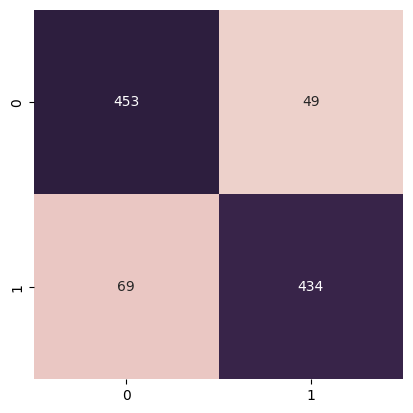

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
matrix_confusion = confusion_matrix(test_labels, ypred)
sb.heatmap(matrix_confusion, square=True, annot=True, cmap=sb.cubehelix_palette(as_cmap=True)
, fmt='d', cbar=False)

In [ ]:
model.save('/content/gdrive/MyDrive/LSTM-model')

In [ ]:
new_model = keras.models.load_model("/content/gdrive/MyDrive/LSTM-model")

In [ ]:
test_string = 'اثرات مخرب و وحشتناک پس از تزریق واکسن ایرانی'
print(test_string)
test_string = cleaning(test_string)
type(test_string)


اثرات مخرب و وحشتناک پس از تزریق واکسن ایرانی


str

In [ ]:
from collections import Counter

# Count unique words
def counter_word1(text):
    count = Counter()
    for word in text.split():
      count[word] += 1
    return count
counter1 = counter_word1(test_string)
num_unique_words1 = len(counter1)
num_unique_words1
test_string = [test_string]
test_string

['مخرب تزریق اثرات وحشتناک واکسن ایرانی']

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# vectorize a text corpus by turning each text into a sequence of integers
tokenizer1 = Tokenizer(num_words=num_unique_words1)
tokenizer1.fit_on_texts(np.asarray(list(test_string)))

In [ ]:
word_index1 = tokenizer1.word_index
word_index1

{'مخرب': 1, 'تزریق': 2, 'اثرات': 3, 'وحشتناک': 4, 'واکسن': 5, 'ایرانی': 6}

In [ ]:
train_sequences1 = tokenizer1.texts_to_sequences(test_string)

In [ ]:
# Pad the sequences to have the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Max number of words in a sequence
max_length1 = 20

train_padded1 = pad_sequences(train_sequences1, maxlen=max_length1, padding="post", truncating="post")
train_padded1

array([[1, 2, 3, 4, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)

In [ ]:
predictions = new_model.predict(train_padded1)
predictions = [1 if p > 0.5 else 0 for p in predictions]
print(predictions)

1/1 [==============================] - 0s 31ms/step
[0]
